# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['puerto ayora',
 'tasiilaq',
 'sodertalje',
 'portobelo',
 'matias olimpio',
 'tobe',
 'tilichiki',
 'ponta do sol',
 'cape town',
 'griffith',
 'hobart',
 'husavik',
 'yellowknife',
 'hithadhoo',
 'severo-kurilsk',
 'chimbote',
 'mataura',
 'belushya guba',
 'grand gaube',
 'bambanglipuro',
 'palmas de monte alto',
 'kodiak',
 'hami',
 'barrow',
 'nyurba',
 'asau',
 'chuy',
 'hermanus',
 'altus',
 'toliary',
 'vao',
 'vangaindrano',
 'busselton',
 'bluff',
 'cururupu',
 'rikitea',
 'east london',
 'dikson',
 'florence',
 'saint anthony',
 'tual',
 'labuan',
 'kapaa',
 'tambovka',
 'alofi',
 'ahipara',
 'toamua',
 'lensk',
 'albany',
 'kirakira',
 'shibetsu',
 'ribeira grande',
 'hasaki',
 'pevek',
 'upernavik',
 'puerto leguizamo',
 'dunedin',
 'puerto ayacucho',
 'saint-philippe',
 'hirara',
 'provideniya',
 'christchurch',
 'tankhoy',
 'tuktoyaktuk',
 'mount gambier',
 'coquimbo',
 'port alfred',
 'lekoni',
 'butaritari',
 'punta arenas',
 'jalu',
 'ushuaia',
 'aksu',
 'cidreira',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# url = api.openweathermap.org/data/2.5/
cities_test = ['noumea','hermanus','cabo san lucas','luderitz','buchanan','hobart','srandakan','esperance','saldanha','ushuaia',
 'zyryanka',
 'souillac']

city_weather_df = pd.DataFrame(columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity',
                                        'Cloudiness', 'Wind Speed', 'Country', 'Date'])
count = 0
print('Begining City-Data Retrieval')
print('-----------------------------')

for city in cities:
    
    count=count+1
    print(f'Processing City {count} | {city}')
    target_url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&units=imperial&appid={1}').format(city, weather_key)
    response = requests.get(target_url).json()
#     print(target_url)
    
    try:   
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]
        clouds = response["clouds"]["all"]
        humidity = response["main"]["humidity"]
        country = response["sys"]["country"]
        date = response["dt"]
    
        city_weather_df = city_weather_df.append({'City':city,
                                              'Lat': lat,
                                              'Lng':lng,
                                              'Max Temp':max_temp,
                                              'Humidity':humidity,
                                              'Cloudiness':clouds,
                                              'Wind Speed':wind_speed,
                                              'Country':country,
                                              'Date':date},ignore_index=True)
        time.sleep(1.1)
    except:
            print('City not found. Skipping...')
            pass
    



Begining City-Data Retrieval
-----------------------------
Processing City 1 | puerto ayora
Processing City 2 | tasiilaq
Processing City 3 | sodertalje
City not found. Skipping...
Processing City 4 | portobelo
Processing City 5 | matias olimpio
Processing City 6 | tobe
Processing City 7 | tilichiki
Processing City 8 | ponta do sol
Processing City 9 | cape town
Processing City 10 | griffith
Processing City 11 | hobart
Processing City 12 | husavik
Processing City 13 | yellowknife
Processing City 14 | hithadhoo
Processing City 15 | severo-kurilsk
Processing City 16 | chimbote
Processing City 17 | mataura
Processing City 18 | belushya guba
City not found. Skipping...
Processing City 19 | grand gaube
Processing City 20 | bambanglipuro
Processing City 21 | palmas de monte alto
Processing City 22 | kodiak
Processing City 23 | hami
Processing City 24 | barrow
Processing City 25 | nyurba
Processing City 26 | asau
Processing City 27 | chuy
Processing City 28 | hermanus
Processing City 29 | altus

Processing City 248 | camacha
Processing City 249 | esperance
Processing City 250 | rocha
Processing City 251 | punalur
Processing City 252 | hualmay
Processing City 253 | kenai
Processing City 254 | hamilton
Processing City 255 | cabedelo
Processing City 256 | marcona
City not found. Skipping...
Processing City 257 | xiongyue
Processing City 258 | tromso
Processing City 259 | vestmannaeyjar
Processing City 260 | lata
Processing City 261 | rognan
Processing City 262 | yerbogachen
Processing City 263 | saint-pierre
Processing City 264 | fatehpur
Processing City 265 | west bay
Processing City 266 | zhezkazgan
Processing City 267 | baruun-urt
Processing City 268 | portland
Processing City 269 | mar del plata
Processing City 270 | kemise
Processing City 271 | nizhnyaya tura
Processing City 272 | pervoye maya
Processing City 273 | amazar
Processing City 274 | khash
Processing City 275 | juba
Processing City 276 | san patricio
Processing City 277 | klaksvik
Processing City 278 | illoqqortoor

Processing City 484 | deputatskiy
Processing City 485 | alice springs
Processing City 486 | ambon
Processing City 487 | beloha
Processing City 488 | mitha tiwana
Processing City 489 | oshkosh
Processing City 490 | atasu
Processing City 491 | olafsvik
Processing City 492 | syracuse
Processing City 493 | havre
Processing City 494 | inhambane
Processing City 495 | aitape
Processing City 496 | matara
Processing City 497 | skjervoy
Processing City 498 | hanzhong
Processing City 499 | kampong cham
Processing City 500 | dakar
Processing City 501 | bhatapara
Processing City 502 | chapais
Processing City 503 | palabuhanratu
City not found. Skipping...
Processing City 504 | kenora
Processing City 505 | camana
Processing City 506 | nalut
Processing City 507 | tranas
Processing City 508 | ardistan
City not found. Skipping...
Processing City 509 | samana
Processing City 510 | saint-augustin
Processing City 511 | sinnamary
Processing City 512 | balkhash
Processing City 513 | kingori
Processing City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_weather_df.to_csv("Outputs/Weather-data.csv")
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,84.20,51,0,19.46,EC,1609363764
1,tasiilaq,65.61,-37.64,15.80,61,3,5.82,GL,1609363765
2,portobelo,9.55,-79.65,82.00,80,34,8.99,PA,1609363766
3,matias olimpio,-3.72,-42.56,84.60,55,94,5.12,BR,1609363767
4,tobe,33.74,132.79,35.01,55,100,8.01,JP,1609363769
...,...,...,...,...,...,...,...,...,...
616,san policarpo,12.18,125.51,81.07,83,99,8.43,PH,1609364527
617,cuamba,-14.80,36.54,71.64,95,100,2.17,MZ,1609364529
618,wangaratta,-36.37,146.33,69.80,60,40,4.70,AU,1609364530
619,miguel hidalgo,19.42,-99.20,69.80,30,5,13.87,MX,1609364531


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_weather_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].astype(float).describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,6.210000e+02
mean,19.899742,21.785636,48.888035,74.304348,52.441224,8.474525,1.609364e+09
std,33.177511,90.428608,31.325215,18.942676,40.174360,6.235706,2.348876e+02
min,-54.800000,-179.170000,-39.820000,1.000000,0.000000,0.310000,1.609363e+09
25%,-7.260000,-60.630000,28.400000,65.000000,4.000000,3.690000,1.609364e+09
50%,22.890000,27.910000,59.000000,79.000000,63.000000,6.930000,1.609364e+09
75%,47.340000,100.450000,75.200000,88.000000,90.000000,11.900000,1.609364e+09
max,78.220000,179.320000,87.850000,100.000000,100.000000,40.260000,1.609365e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

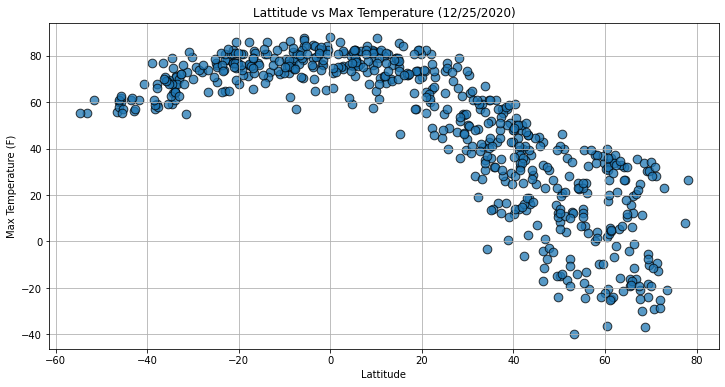

In [12]:
lat_temp_df = city_weather_df[['Lat','Max Temp']]
lat_temp_df

plt.rcParams["figure.figsize"] = (12, 6)
lat_temp_df.plot.scatter("Lat", "Max Temp", marker="o", edgecolors="black", s=75,
                         alpha=0.75, title="Lattitude vs Max Temperature (12/25/2020)")
plt.grid()
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('Outputs/Scatter-Lat vs Temperature.png')


## Latitude vs. Humidity Plot

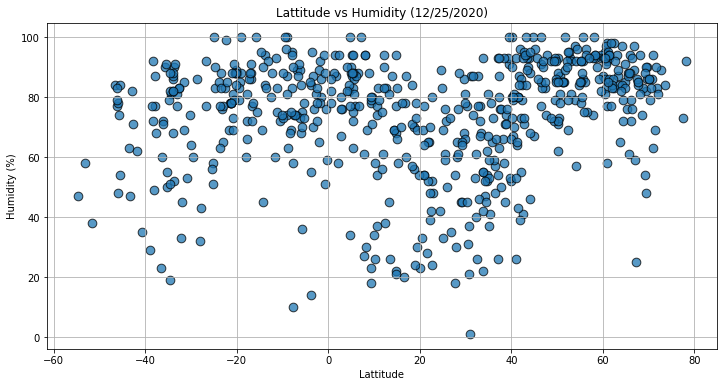

In [13]:
lat_humidity_df = city_weather_df[['Lat','Humidity']]

plt.rcParams["figure.figsize"] = (12, 6)
lat_humidity_df.plot.scatter("Lat", "Humidity", marker="o", edgecolors="black", s=75,
                         alpha=0.75, title="Lattitude vs Humidity (12/25/2020)")
plt.grid()
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.savefig('Outputs/Scatter-Lat vs Humidity.png')


## Latitude vs. Cloudiness Plot

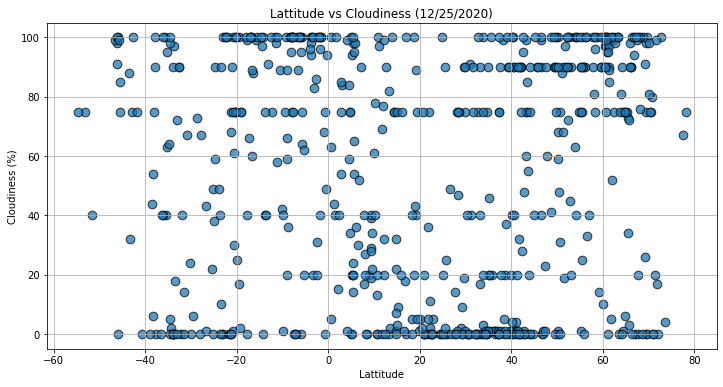

In [14]:
lat_cloudiness_df = city_weather_df[['Lat','Cloudiness']]

plt.rcParams["figure.figsize"] = (12, 6)
lat_cloudiness_df.plot.scatter("Lat", "Cloudiness", marker="o", edgecolors="black", s=75,
                         alpha=0.75, title="Lattitude vs Cloudiness (12/25/2020)")
plt.grid()
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Outputs/Scatter-Lat vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

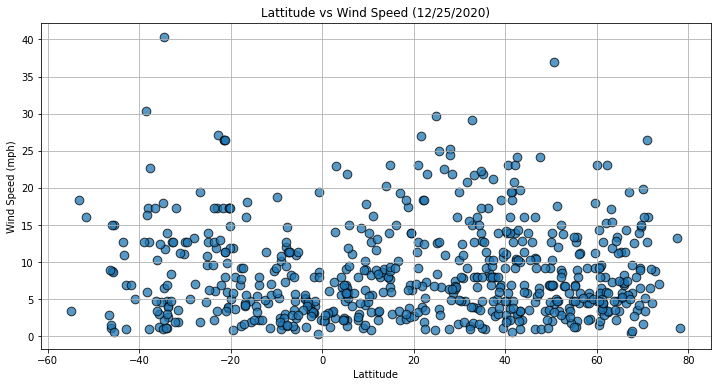

In [15]:
lat_Wind_df = city_weather_df[['Lat','Wind Speed']]

plt.rcParams["figure.figsize"] = (12, 6)
lat_Wind_df.plot.scatter("Lat", "Wind Speed", marker="o", edgecolors="black", s=75,
                         alpha=0.75, title="Lattitude vs Wind Speed (12/25/2020)")
plt.grid()
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('Outputs/Scatter-Lat vs WindSpeed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8387732905305615


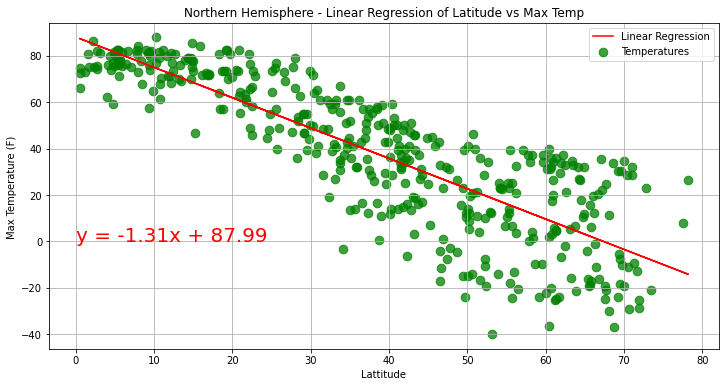

In [17]:
import scipy.stats as st
northern_df = city_weather_df.loc[city_weather_df['Lat']>=0]

x = northern_df['Lat']
y = northern_df['Max Temp']

correlation = st.pearsonr(x,y)
# correlation = round(correlation[0],3)
print(f"The r-value is: {correlation[0]}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
y_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (12, 6)
northern_df.plot.scatter("Lat", "Max Temp", color="green", s=75,
                         alpha=0.75, title="Northern Hemisphere - Linear Regression of Latitude vs Max Temp", 
                         label="Temperatures")
plt.plot(x,y_values,"r-",label='Linear Regression')
plt.annotate(line_eq,(0,0),fontsize=20,color="red")
plt.ylabel('Max Temperature (F) ')
plt.xlabel('Lattitude')
plt.legend()
plt.grid()
plt.savefig('Outputs/Northern-Lat vs Temp.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6991486731528551


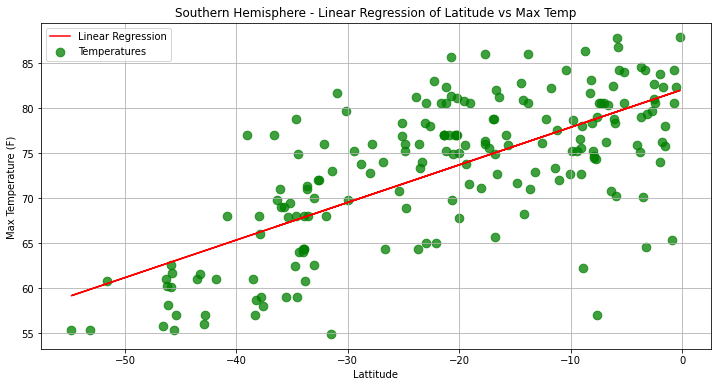

In [18]:
southern_df = city_weather_df.loc[city_weather_df['Lat']<0]

x = southern_df['Lat']
y = southern_df['Max Temp']

correlation = st.pearsonr(x,y)
# correlation = round(correlation[0],3)
print(f"The r-value is: {correlation[0]}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
y_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (12, 6)
southern_df.plot.scatter("Lat", "Max Temp", color="green", s=75,
                         alpha=0.75, title="Southern Hemisphere - Linear Regression of Latitude vs Max Temp", 
                         label="Temperatures")
plt.plot(x,y_values,"r-",label='Linear Regression')
plt.annotate(line_eq,(-20,52),fontsize=20,color="red")
plt.ylabel('Max Temperature (F) ')
plt.xlabel('Lattitude')
plt.legend()
plt.grid()
plt.savefig('Outputs/Southern-Lat vs Temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.33472117354663433


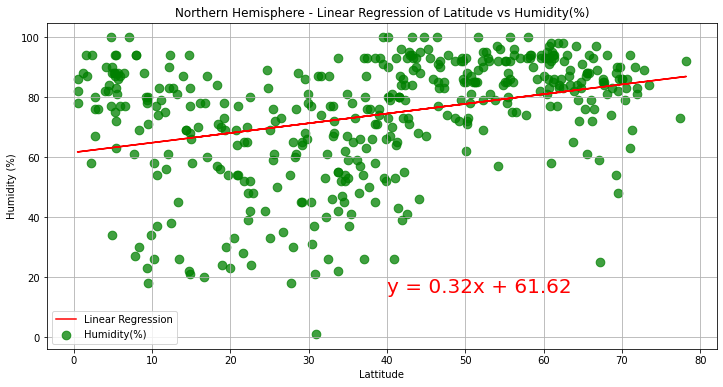

In [19]:
x = northern_df['Lat']
y = northern_df['Humidity'].astype(float)

correlation = st.pearsonr(x,y)
# correlation = round(correlation[0],3)
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
y_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (12, 6)
northern_df.plot.scatter("Lat", "Humidity", color="green", s=75,
                         alpha=0.75, title="Northern Hemisphere - Linear Regression of Latitude vs Humidity(%)", 
                         label="Humidity(%)")
plt.plot(x,y_values,"r-",label='Linear Regression')
plt.annotate(line_eq,(40,15),fontsize=20,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Lattitude')
plt.legend()
plt.grid()
plt.savefig('Outputs/Northern-Lat vs Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2341047702827174


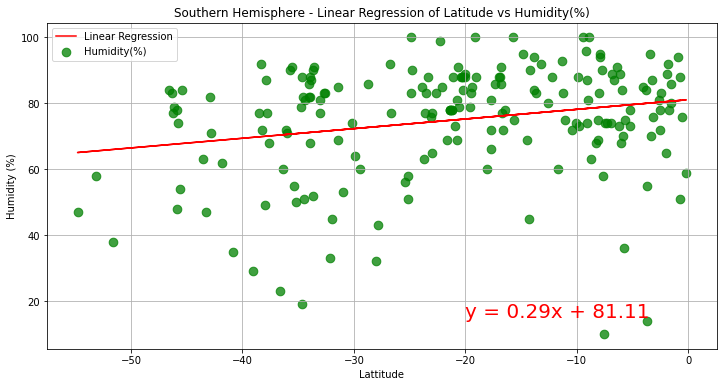

In [20]:
x = southern_df['Lat']
y = southern_df['Humidity'].astype(float)

correlation = st.pearsonr(x,y)
# correlation = round(correlation[0],3)
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
y_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (12, 6)
southern_df.plot.scatter("Lat", "Humidity", color="green", s=75,
                         alpha=0.75, title="Southern Hemisphere - Linear Regression of Latitude vs Humidity(%)", 
                         label="Humidity(%)")
plt.plot(x,y_values,"r-",label='Linear Regression')
plt.annotate(line_eq,(-20,15),fontsize=20,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Lattitude')
plt.legend()
plt.grid()
plt.savefig('Outputs/Southern-Lat vs Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2751214586922369


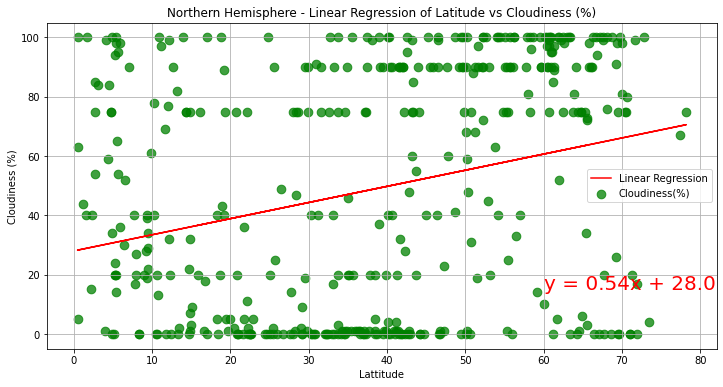

In [21]:
x = northern_df['Lat']
y = northern_df['Cloudiness'].astype(float)

correlation = st.pearsonr(x,y)
# correlation = round(correlation[0],3)
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
y_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (12, 6)
northern_df.plot.scatter("Lat", "Cloudiness", color="green", s=75,
                         alpha=0.75, title="Northern Hemisphere - Linear Regression of Latitude vs Cloudiness (%)", 
                         label="Cloudiness(%)")
plt.plot(x,y_values,"r-",label='Linear Regression')
plt.annotate(line_eq,(60,15),fontsize=20,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Lattitude')
plt.legend()
plt.grid()
plt.savefig('Outputs/Northern-Lat vs Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1997082469730329


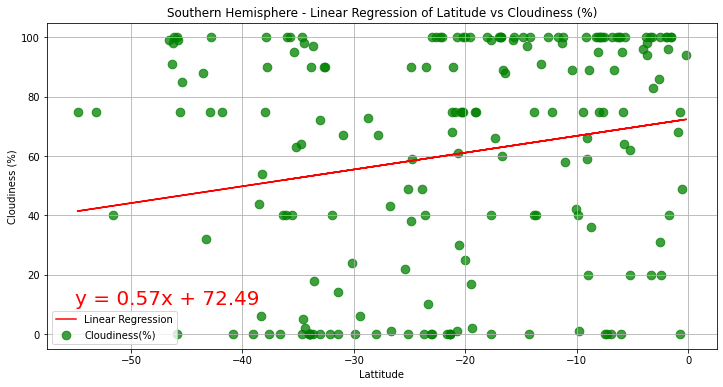

In [22]:
x = southern_df['Lat']
y = southern_df['Cloudiness'].astype(float)

correlation = st.pearsonr(x,y)
# correlation = round(correlation[0],3)
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
y_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (12, 6)
southern_df.plot.scatter("Lat", "Cloudiness", color="green", s=75,
                         alpha=0.75, title="Southern Hemisphere - Linear Regression of Latitude vs Cloudiness (%)", 
                         label="Cloudiness(%)")
plt.plot(x,y_values,"r-",label='Linear Regression')
plt.annotate(line_eq,(-55,10),fontsize=20,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Lattitude')
plt.legend()
plt.grid()
plt.savefig('Outputs/Southern-Lat vs Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004558393328170034


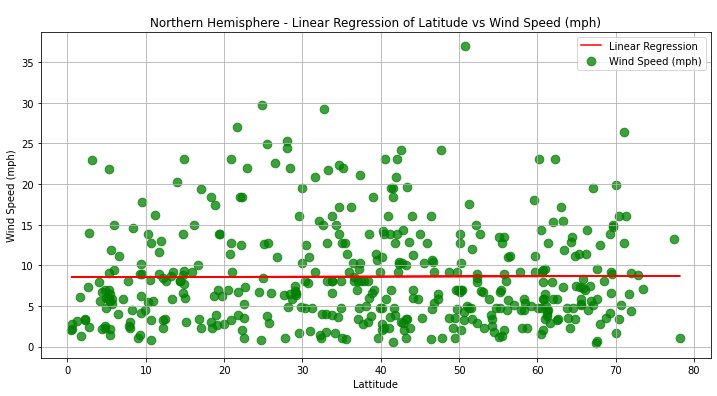

In [23]:
x = northern_df['Lat']
y = northern_df['Wind Speed'].astype(float)

correlation = st.pearsonr(x,y)
# correlation = round(correlation[0],3)
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
y_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (12, 6)
northern_df.plot.scatter("Lat", "Wind Speed", color="green", s=75,
                         alpha=0.75, title="Northern Hemisphere - Linear Regression of Latitude vs Wind Speed (mph)", 
                         label="Wind Speed (mph)")
plt.plot(x,y_values,"r-",label='Linear Regression')
plt.annotate(line_eq,(0,40),fontsize=20,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Lattitude')
plt.legend()
plt.grid()
plt.savefig('Outputs/Northern-Lat vs Windspeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2144939479314083


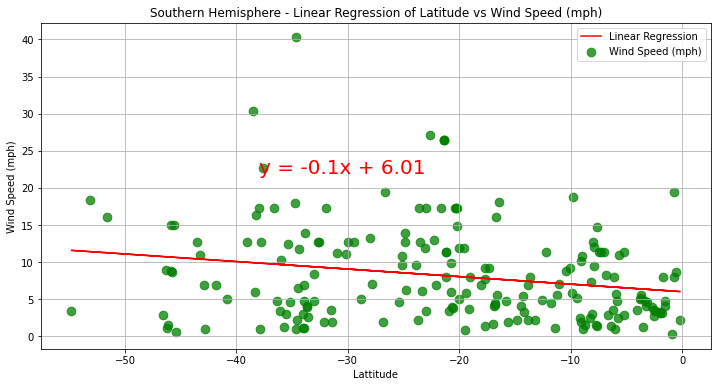

In [24]:
x = southern_df['Lat']
y = southern_df['Wind Speed'].astype(float)

correlation = st.pearsonr(x,y)
# correlation = round(correlation[0],3)
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
y_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (12, 6)
southern_df.plot.scatter("Lat", "Wind Speed", color="green", s=75,
                         alpha=0.75, title="Southern Hemisphere - Linear Regression of Latitude vs Wind Speed (mph)", 
                         label="Wind Speed (mph)")
plt.plot(x,y_values,"r-",label='Linear Regression')
plt.annotate(line_eq,(-38,22),fontsize=20,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Lattitude')
plt.legend()
plt.grid()
plt.savefig('Outputs/Southern-Lat vs Windspeed.png')